# This program uses Matplotlib + the dual moving average crossover to determine when to buy and sell stock

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Download AAPL.csv from: https://finance.yahoo.com/quote/AAP/history?p=AAP
# Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
# Read the data
AAPL = pd.read_csv('AAPL.csv')

# Show the first 5 rows of the data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,2.682143,2.709643,2.653571,2.673571,2.310338,712639200
1,2006-10-03,2.658929,2.676786,2.613929,2.645714,2.286266,790708800
2,2006-10-04,2.646429,2.695000,2.612857,2.692143,2.326385,829082800
3,2006-10-05,2.661786,2.720000,2.647500,2.672500,2.309412,683883200
4,2006-10-06,2.657857,2.680000,2.636071,2.650714,2.290586,466958800
...,...,...,...,...,...,...,...
3503,2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,152470100
3504,2020-09-02,137.589996,137.979996,127.000000,131.399994,131.399994,200119000
3505,2020-09-03,126.910004,128.839996,120.500000,120.879997,120.879997,257599600
3506,2020-09-04,120.070000,123.699997,110.889999,120.959999,120.959999,332607200


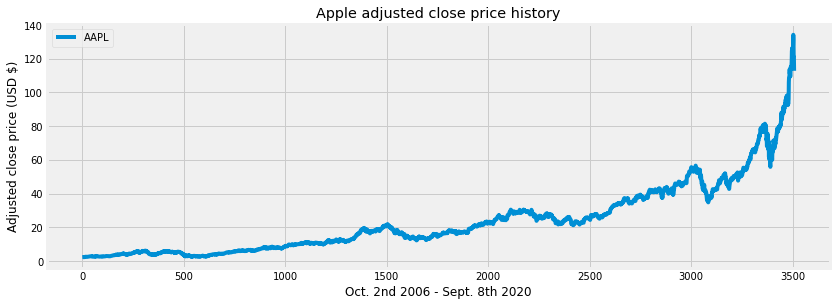

In [ ]:
# Visualize the data
plt.figure(figsize = (12.5, 4.5) )
plt.plot(AAPL['Adj Close'], label = 'AAPL')

plt.title('Apple adjusted close price history')
plt.xlabel('Oct. 2nd 2006 - Sept. 8th 2020')
plt.ylabel('Adjusted close price (USD $)')

plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create the simple moving average with a 30-day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()

# Show the SMA30
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3503,112.119358
3504,113.262777
3505,114.202847
3506,115.153236


In [ ]:
# Create a simple moving average with 100-day windows
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window = 100).mean()

# Show the SMA30
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3503,91.198034
3504,91.831980
3505,92.326380
3506,92.828101


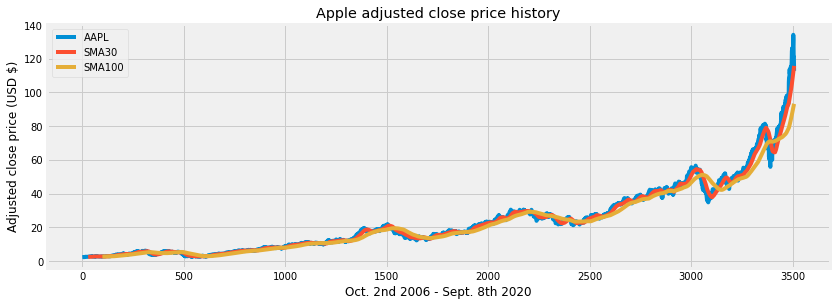

In [ ]:
# Visualize the data
plt.figure(figsize = (12.5, 4.5) )
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')

plt.title('Apple adjusted close price history')
plt.xlabel('Oct. 2nd 2006 - Sept. 8th 2020')
plt.ylabel('Adjusted close price (USD $)')

plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create a new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']

# Show the data frame
data

,AAPL,SMA30,SMA100
0,2.310338,NaN,NaN
1,2.286266,NaN,NaN
2,2.326385,NaN,NaN
3,2.309412,NaN,NaN
4,2.290586,NaN,NaN
...,...,...,...
3503,134.179993,112.119358,91.198034
3504,131.399994,113.262777,91.831980
3505,120.879997,114.202847,92.326380
3506,120.959999,115.153236,92.828101


In [ ]:
# Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] >  data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    elif data['SMA30'][i] <  data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [ ]:
# Store the buy and sell data into a variable
buy_sell_signals = buy_sell(data)
data['Buy Signal Price'] = buy_sell_signals[0]
data['Sell Signal Price'] = buy_sell_signals[1]

In [ ]:
# Show the data
data

,AAPL,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,2.310338,NaN,NaN,NaN,NaN
1,2.286266,NaN,NaN,NaN,NaN
2,2.326385,NaN,NaN,NaN,NaN
3,2.309412,NaN,NaN,NaN,NaN
4,2.290586,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3503,134.179993,112.119358,91.198034,NaN,NaN
3504,131.399994,113.262777,91.831980,NaN,NaN
3505,120.879997,114.202847,92.326380,NaN,NaN
3506,120.959999,115.153236,92.828101,NaN,NaN


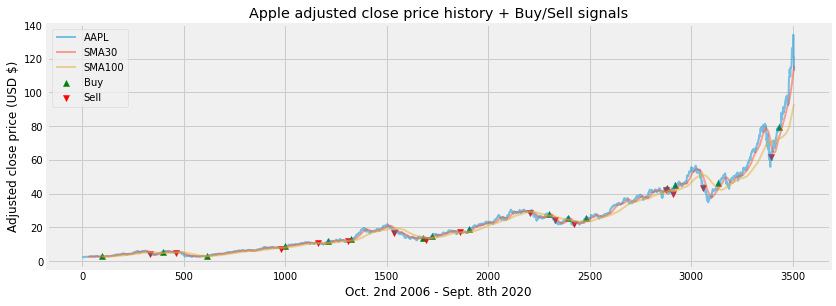

In [ ]:
# Visualize the data and the strategy to buy & sell the stock
plt.figure(figsize = (12.5, 4.5) )
plt.plot(AAPL['Adj Close'], label = 'AAPL', alpha = 0.5, lw = 2)
plt.plot(SMA30['Adj Close'], label = 'SMA30', alpha = 0.5, lw = 2)
plt.plot(SMA100['Adj Close'], label = 'SMA100', alpha = 0.5, lw = 2)

plt.scatter(data.index, data['Buy Signal Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell Signal Price'], label = 'Sell', marker = 'v', color = 'red')


plt.title('Apple adjusted close price history + Buy/Sell signals')
plt.xlabel('Oct. 2nd 2006 - Sept. 8th 2020')
plt.ylabel('Adjusted close price (USD $)')

plt.legend(loc='upper left')
plt.show()